--- First 5 Rows of the Dataset ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies       

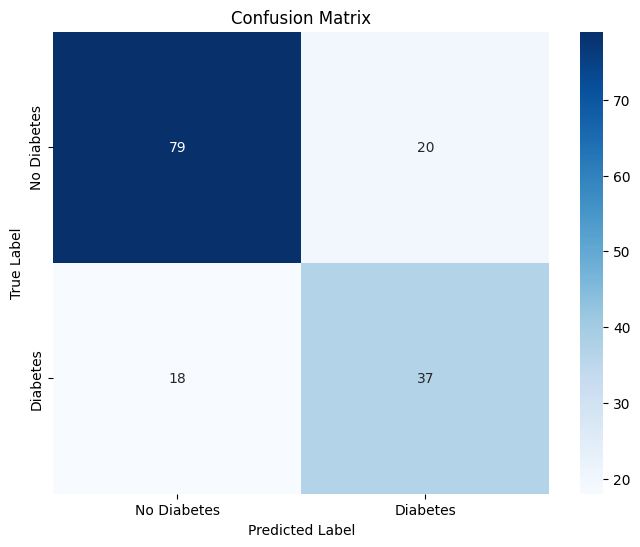

In [1]:
# -*- coding: utf-8 -*-
"""
Assignment-1: Logistic Regression on Pima Indians Diabetes Dataset

This script is designed to be run in a Google Colab notebook.
It performs the following steps:
1. Loads the Pima Indians Diabetes dataset from a URL.
2. Performs basic exploratory data analysis (EDA).
3. Preprocesses the data by splitting it and scaling the features.
4. Trains a Logistic Regression model.
5. Evaluates the model's performance using various metrics.
6. Visualizes the results, including a confusion matrix.
"""

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOAD THE DATASET
# The dataset is hosted on a public GitHub repository for easy access.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# Define column names as the CSV file does not have a header row.
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)

# 3. EXPLORATORY DATA ANALYSIS (EDA)

# Display the first 5 rows of the dataframe
print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n" + "="*50 + "\n")

# Get a summary of the dataframe, including data types and non-null values
print("--- Dataset Information ---")
df.info()
print("\n" + "="*50 + "\n")

# Get descriptive statistics for each column
print("--- Descriptive Statistics ---")
print(df.describe())
print("\n" + "="*50 + "\n")

# Check for missing values. In this dataset, some missing values are represented as 0.
# While 'Pregnancies' and 'Outcome' can be 0, columns like 'Glucose', 'BloodPressure', 'BMI' cannot.
# For this assignment, we will proceed without handling these '0' values,
# but in a real-world scenario, they should be imputed or handled carefully.
print("--- Count of Zeros in Columns ---")
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())
print("\n" + "="*50 + "\n")


# 4. DATA PREPROCESSING

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This is important for logistic regression to perform well.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. MODEL TRAINING

# Initialize the Logistic Regression model
# The solver 'liblinear' is a good choice for small datasets.
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on the scaled training data
print("--- Training the Logistic Regression Model ---")
model.fit(X_train_scaled, y_train)
print("Model training completed successfully.")
print("\n" + "="*50 + "\n")


# 6. MODEL EVALUATION

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print("\n")

# Display the classification report
# This shows precision, recall, and F1-score for each class.
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# 7. VISUALIZE THE RESULTS

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()